<a href="https://colab.research.google.com/github/opseoul/First-repo/blob/main/TaeYeonKim_NASDAQProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Date      Open      High       Low     Close  Adj Close  Volume
0  2002-07-01  5.000000  5.000000  5.000000  5.000000   4.092412    3900
1  2002-07-02  5.166667  5.500000  5.000000  5.043333   4.127880   21000
2  2002-07-03  4.666667  5.333333  4.666667  5.000000   4.092412   30600
3  2002-07-05  5.000000  5.000000  5.000000  5.000000   4.092412    1500
4  2002-07-08  4.666667  4.666667  4.666667  4.666667   3.819585     900
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


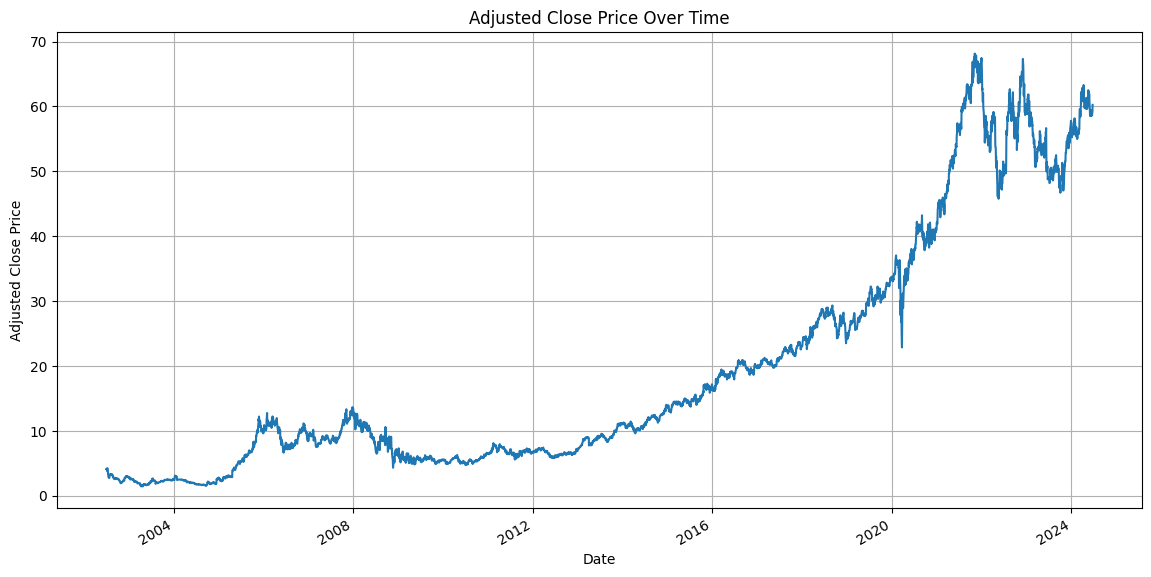

              Open         High          Low        Close    Adj Close  \
count  5532.000000  5532.000000  5532.000000  5532.000000  5532.000000   
mean     21.107038    21.336314    20.874459    21.110641    19.363568   
std      18.438566    18.589643    18.277556    18.437644    18.249528   
min       1.750000     1.750000     1.716667     1.750000     1.432344   
25%       7.712500     7.832500     7.582500     7.713333     6.315955   
50%      12.988333    13.200000    12.800000    12.963333    10.779410   
75%      30.049999    30.325000    29.868333    30.081666    27.588704   
max      71.366669    71.653336    70.629997    70.943336    68.150131   

             Volume  
count  5.532000e+03  
mean   4.211989e+06  
std    4.275828e+06  
min    0.000000e+00  
25%    1.835700e+06  
50%    2.966750e+06  
75%    5.481525e+06  
max    8.861160e+07  


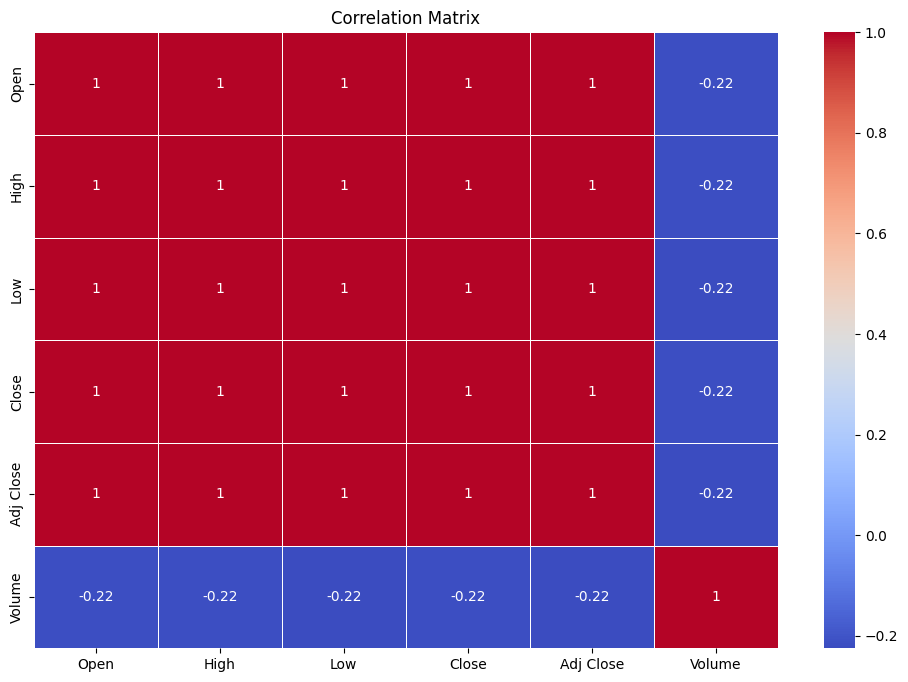

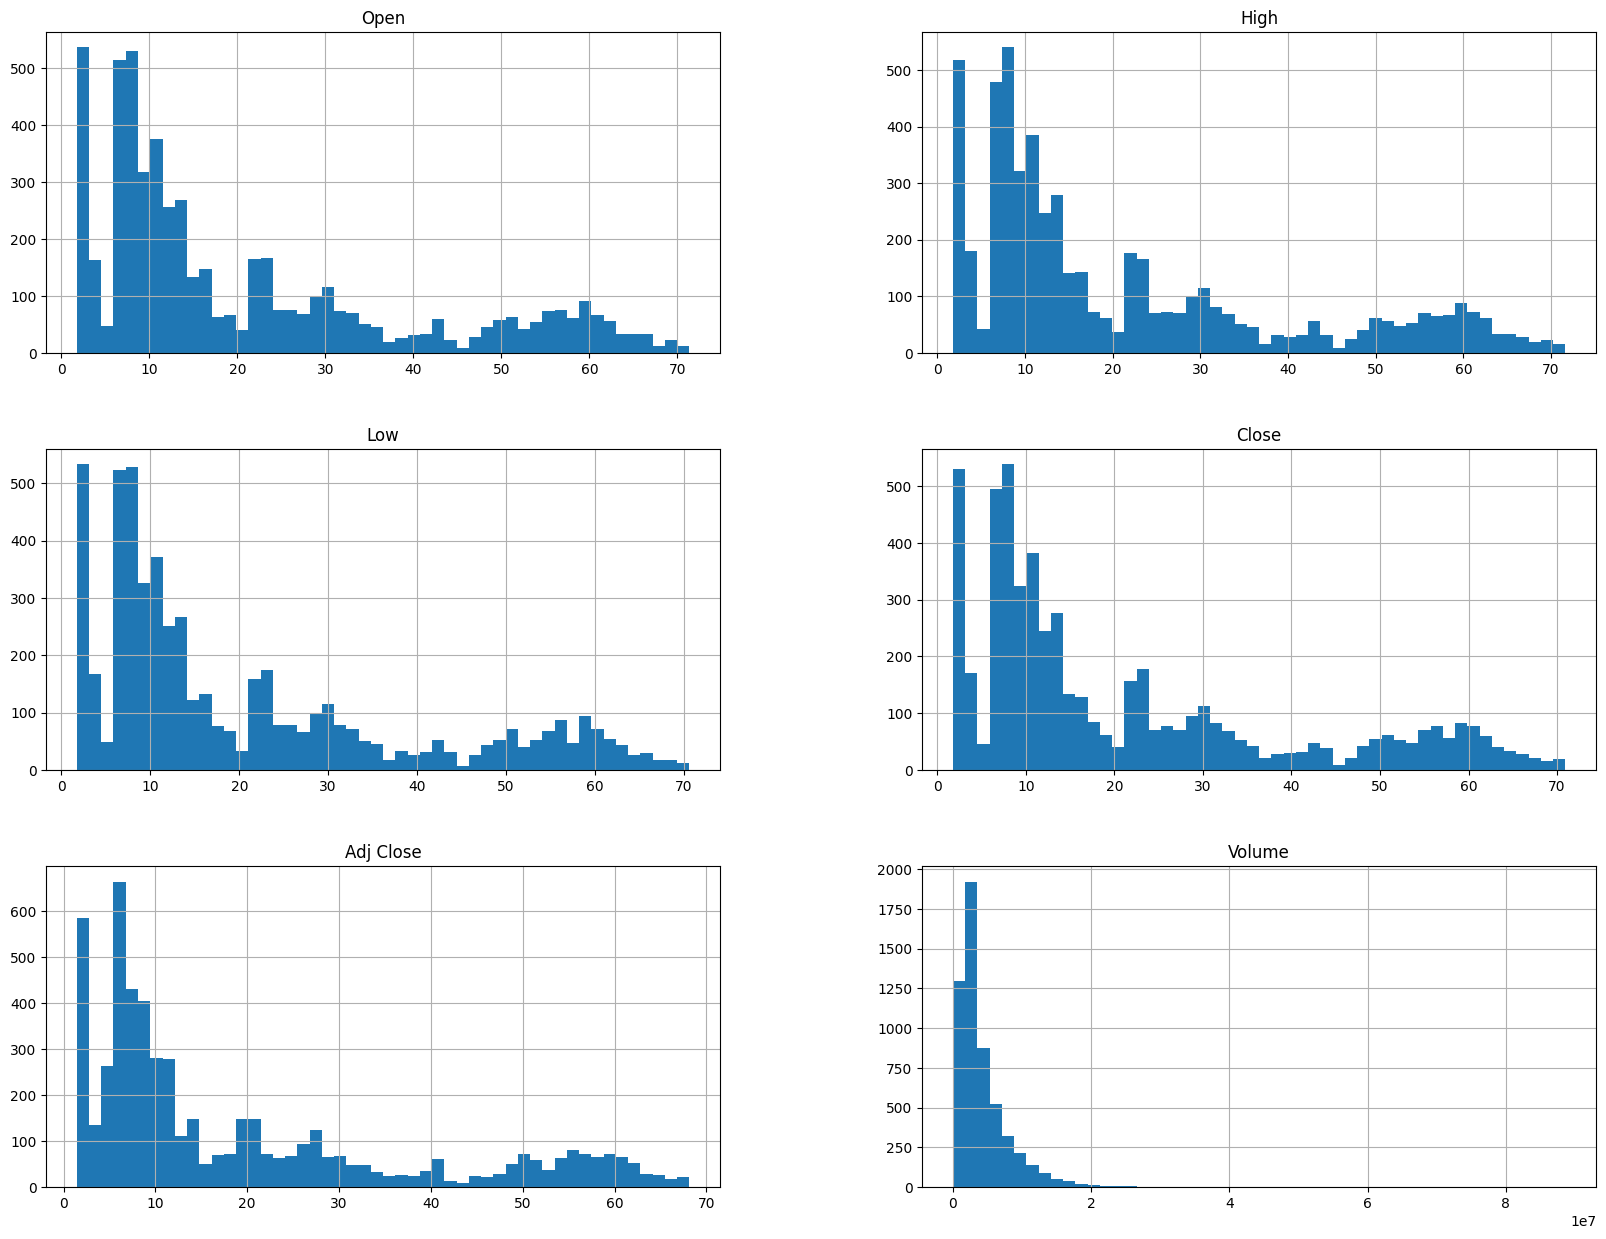

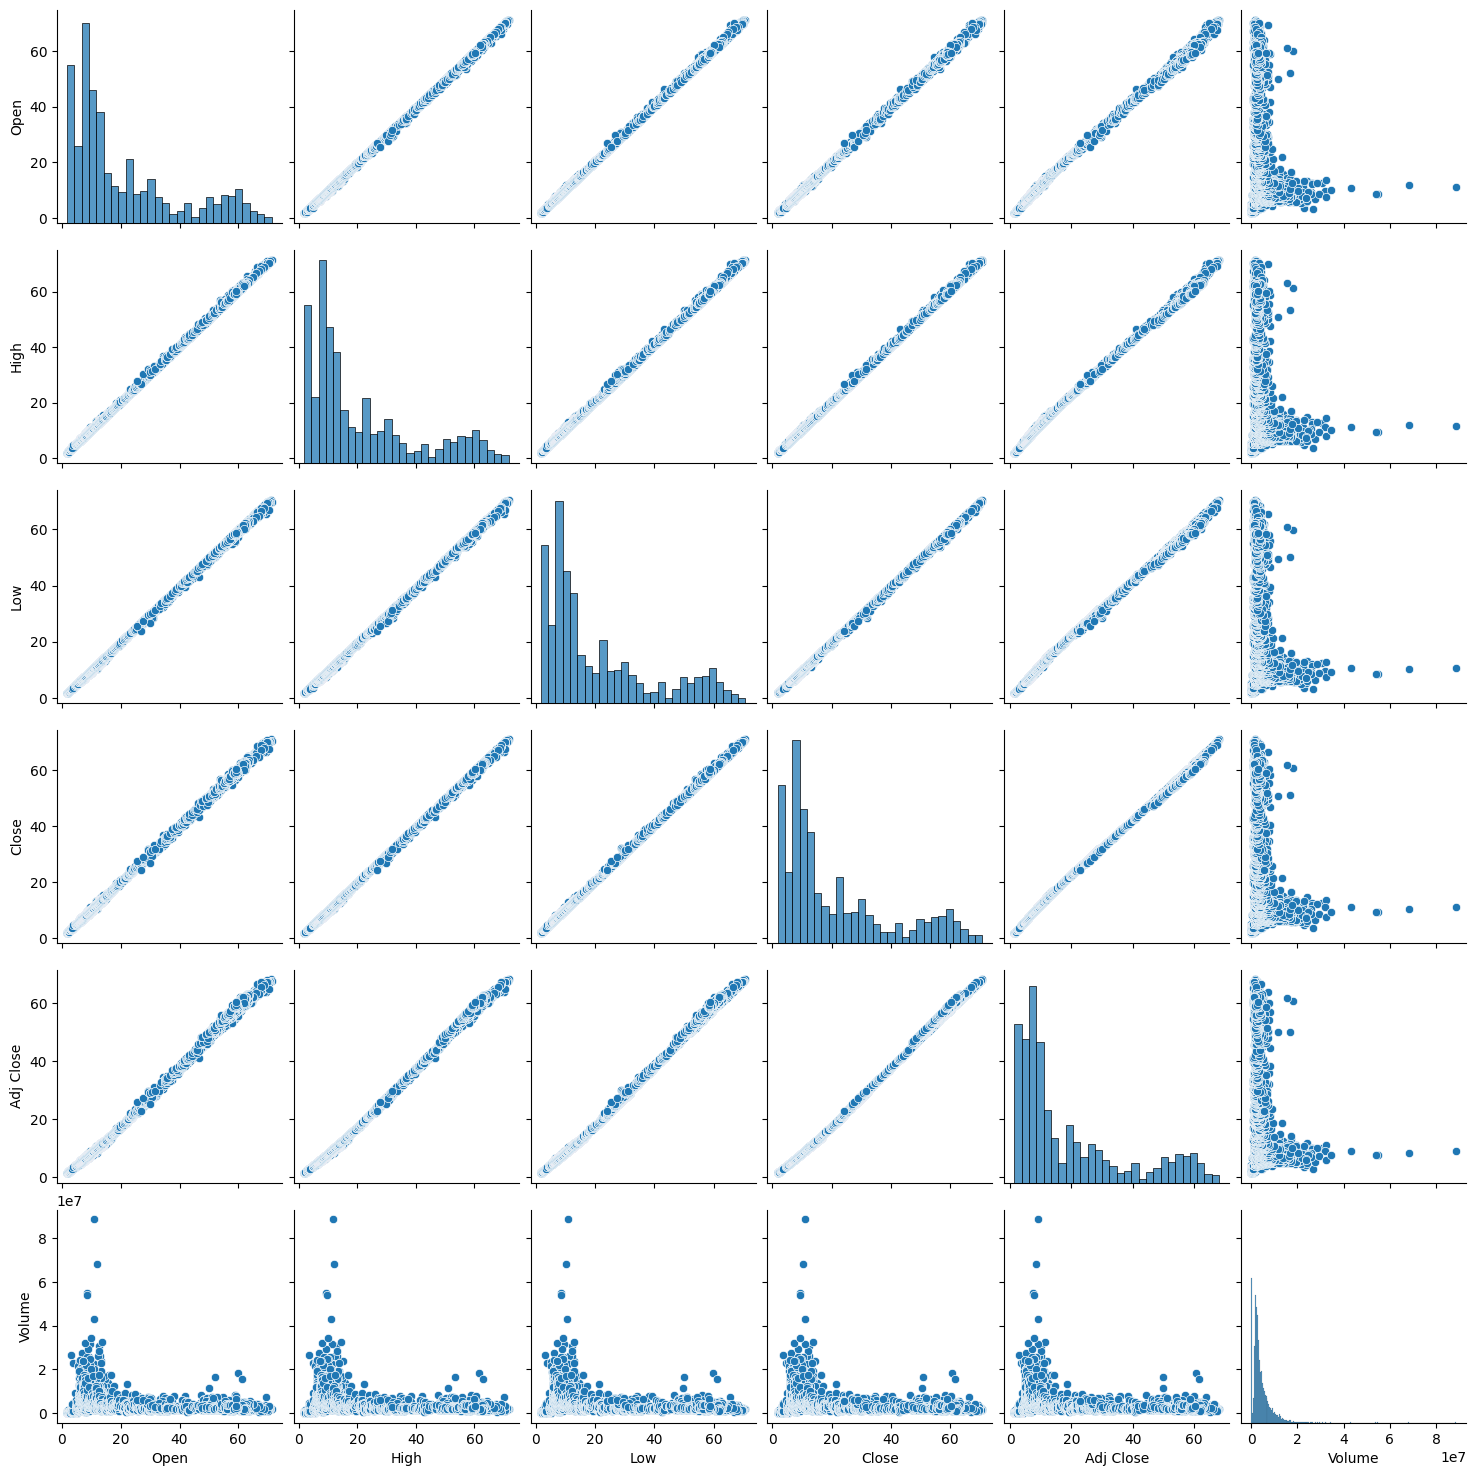

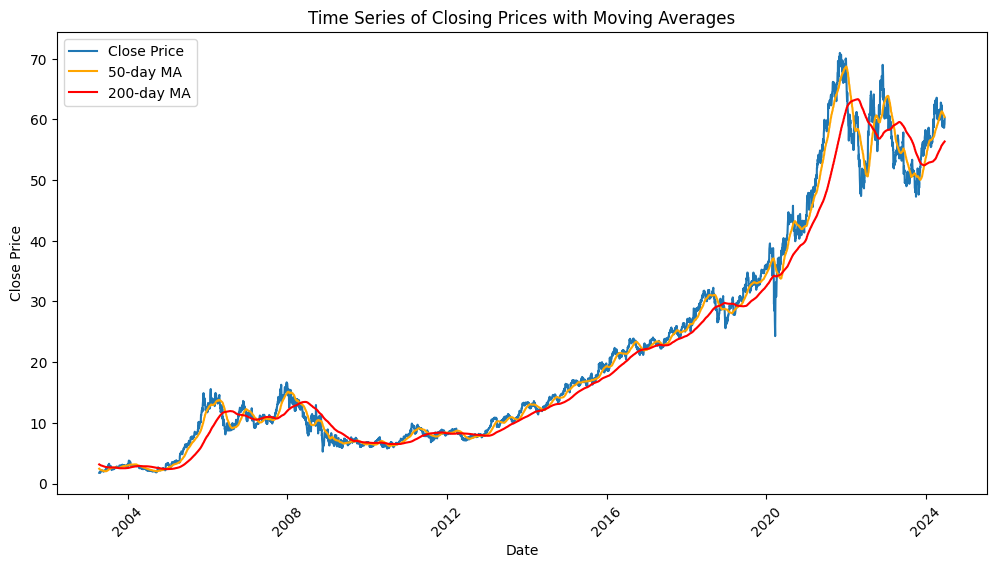

Linear Regression MSE: 0.4638510203725992, R2: 0.9986767567435221
Random Forest Regression MSE: 0.05056147439828778, R2: 0.9998557615978049
Support Vector Regression MSE: 0.5817383321624127, R2: 0.9983404556824079


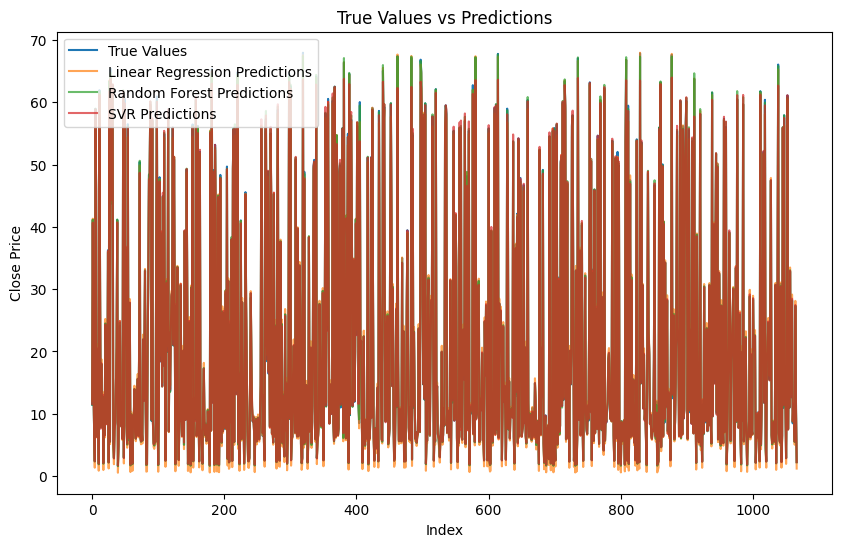

            Predicted_LR  Predicted_RF  Predicted_SVR     Actual
Date                                                            
2007-11-19     12.038420     11.466354      11.563379  11.458755
2020-08-06     41.318847     41.142310      40.674038  41.149426
2015-07-22     15.464040     14.707226      14.703250  14.818927
2006-06-22      7.617301      7.510837       7.715439   7.532767
2003-12-12      1.322635      2.337803       2.360154   2.346316


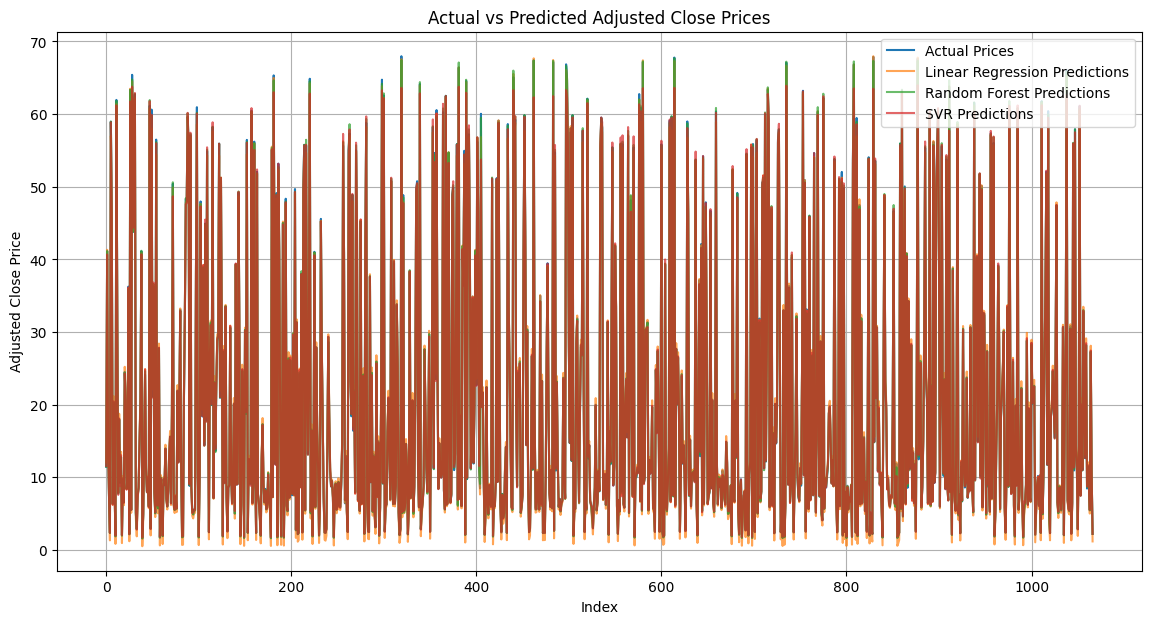

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

file_path = '/content/sample_data/NDAQ.csv'
df = pd.read_csv(file_path)

print(df.head())
print(df.columns)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Adjusted close price
plt.figure(figsize=(14, 7))
df['Adj Close'].plot()
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()

# Descriptive statistics
print(df.describe())

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Histogram of all columns
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Pairplot to visualize relationships between all features
sns.pairplot(df)
plt.show()

# Handle missing values (if any)
df = df.dropna()

# Feature engineering: Moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Drop rows with NaN values created by rolling averages
df = df.dropna()

# Time series plot of 'Close' price
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['MA50'], label='50-day MA', color='orange')
plt.plot(df.index, df['MA200'], label='200-day MA', color='red')
plt.title('Time Series of Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Features and target
features = ['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']
X = df[features]
y = df['Adj Close']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}, R2: {r2_lr}')

# Random Forest Regression Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regression MSE: {mse_rf}, R2: {r2_rf}')

# Support Vector Regression Model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'Support Vector Regression MSE: {mse_svr}, R2: {r2_svr}')

# Plot predictions vs true values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Values')
plt.plot(y_pred_lr, label='Linear Regression Predictions', alpha=0.7)
plt.plot(y_pred_rf, label='Random Forest Predictions', alpha=0.7)
plt.plot(y_pred_svr, label='SVR Predictions', alpha=0.7)
plt.title('True Values vs Predictions')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Predict the adjusted close price for the test set and visualize the result
df_predictions = pd.DataFrame(data={'Predicted_LR': y_pred_lr, 'Predicted_RF': y_pred_rf, 'Predicted_SVR': y_pred_svr, 'Actual': y_test})
print(df_predictions.head())

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(df_predictions['Actual'].values, label='Actual Prices')
plt.plot(df_predictions['Predicted_LR'].values, label='Linear Regression Predictions', alpha=0.7)
plt.plot(df_predictions['Predicted_RF'].values, label='Random Forest Predictions', alpha=0.7)
plt.plot(df_predictions['Predicted_SVR'].values, label='SVR Predictions', alpha=0.7)
plt.title('Actual vs Predicted Adjusted Close Prices')
plt.xlabel('Index')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()


         Date      Open      High       Low     Close  Adj Close  Volume
0  2002-07-01  5.000000  5.000000  5.000000  5.000000   4.092412    3900
1  2002-07-02  5.166667  5.500000  5.000000  5.043333   4.127880   21000
2  2002-07-03  4.666667  5.333333  4.666667  5.000000   4.092412   30600
3  2002-07-05  5.000000  5.000000  5.000000  5.000000   4.092412    1500
4  2002-07-08  4.666667  4.666667  4.666667  4.666667   3.819585     900
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


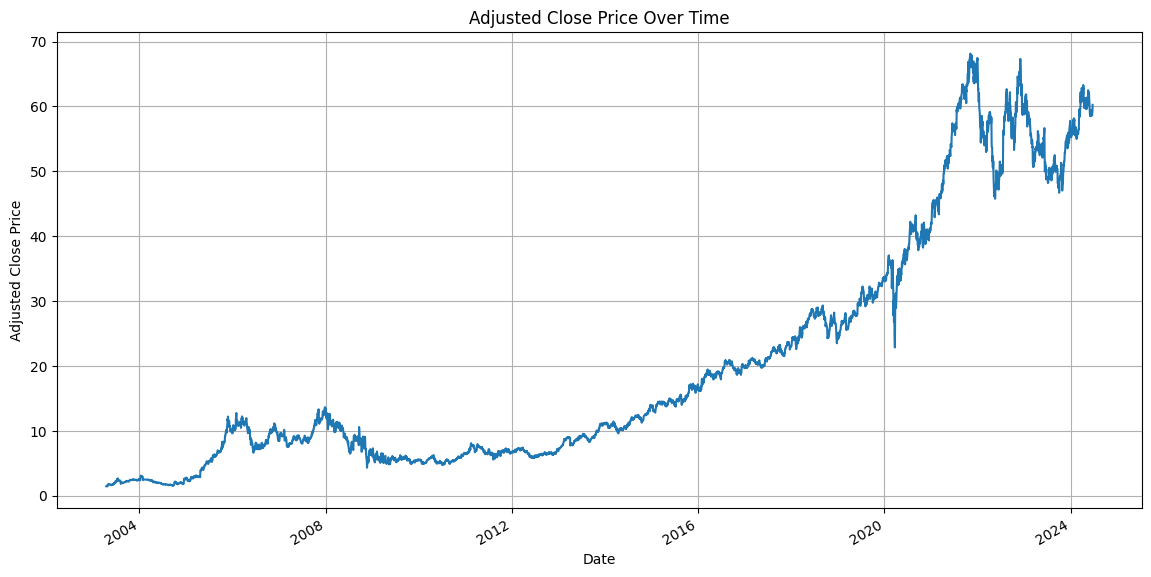

              Open         High          Low        Close    Adj Close  \
count  5333.000000  5333.000000  5333.000000  5333.000000  5333.000000   
mean     21.776747    22.013126    21.537138    21.780646    19.989753   
std      18.444034    18.593493    18.284172    18.442767    18.291023   
min       1.750000     1.750000     1.716667     1.750000     1.432344   
25%       7.996667     8.116667     7.893333     8.020000     6.566956   
50%      13.360000    13.583333    13.156667    13.356667    11.087725   
75%      30.586666    30.959999    30.299999    30.620001    27.965214   
max      71.366669    71.653336    70.629997    70.943336    68.150131   

             Volume         MA50        MA200  
count  5.333000e+03  5333.000000  5333.000000  
mean   4.367746e+06    21.515248    20.741444  
std    4.276712e+06    18.263265    17.733788  
min    0.000000e+00     2.005800     2.367167  
25%    1.940700e+06     7.946133     8.077083  
50%    3.065700e+06    13.092467    12.382067

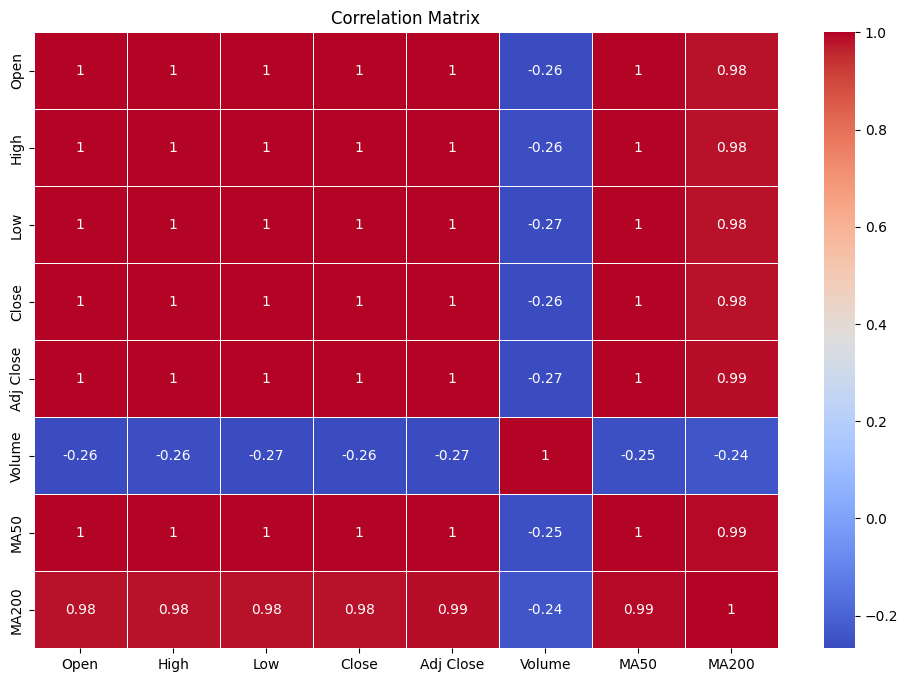

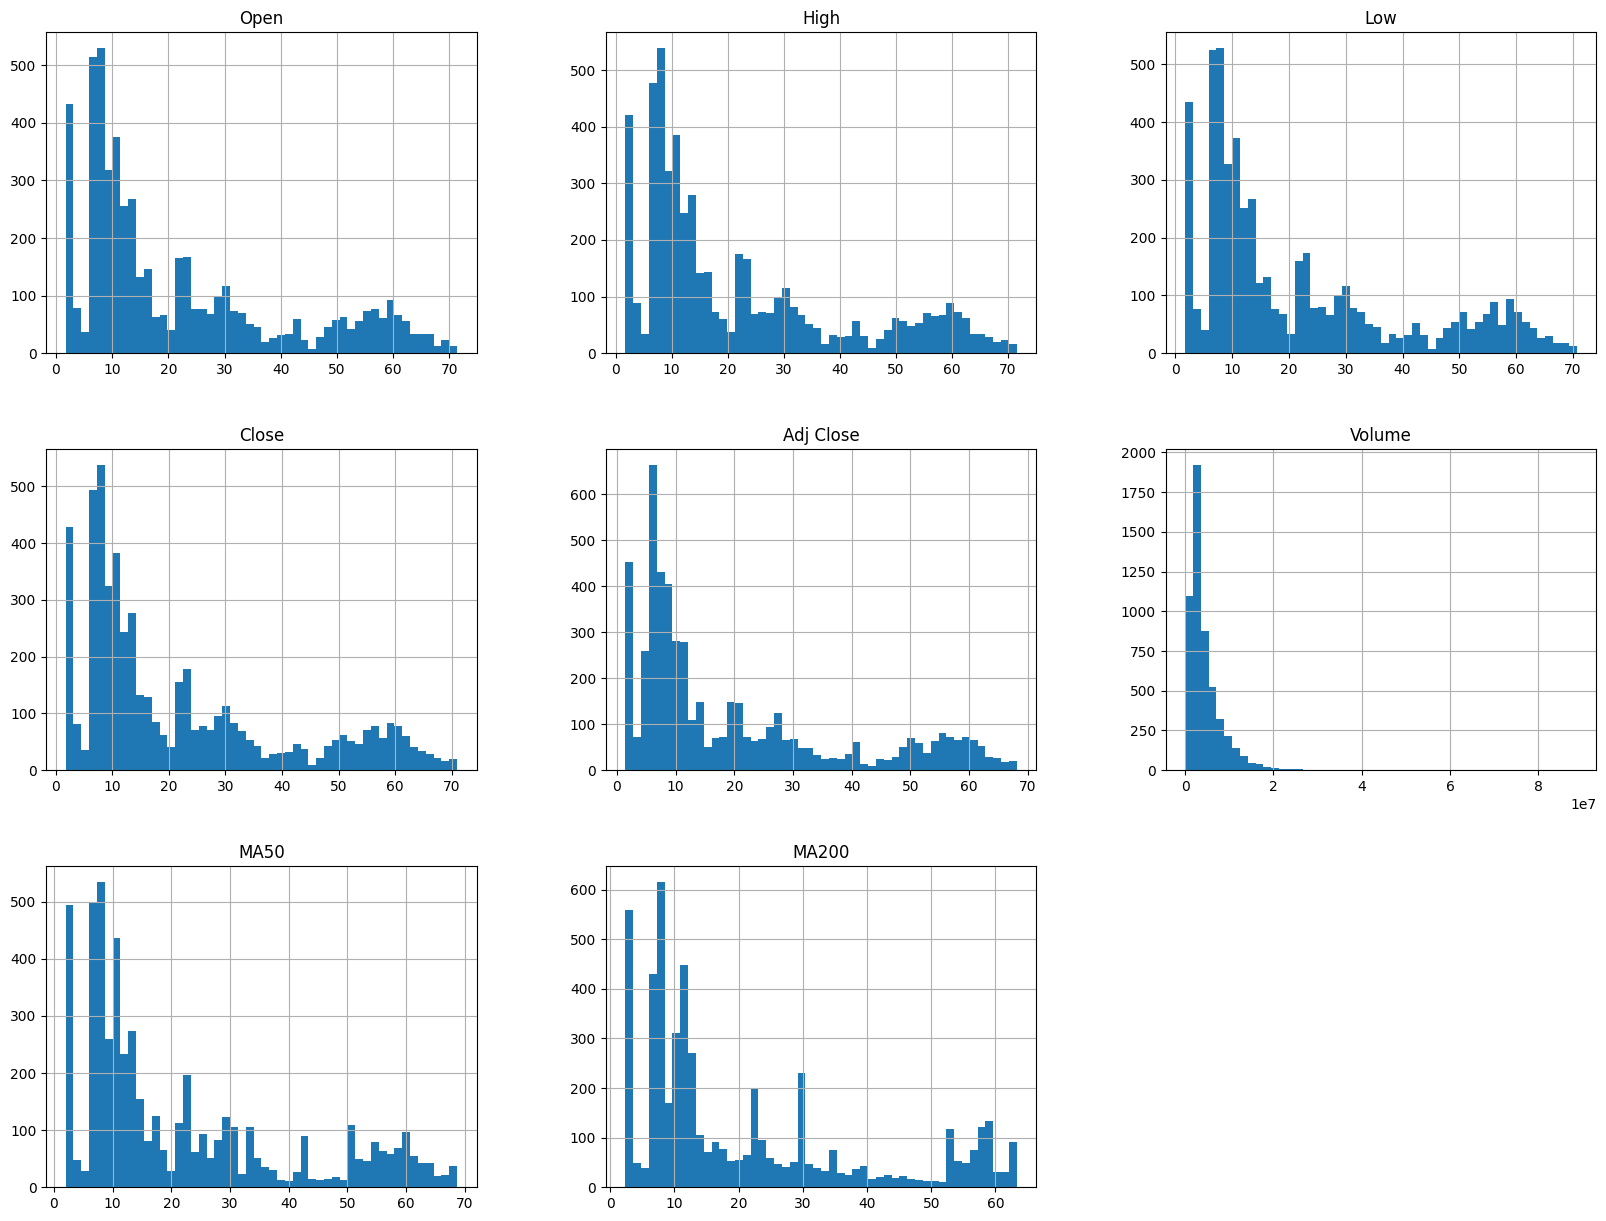

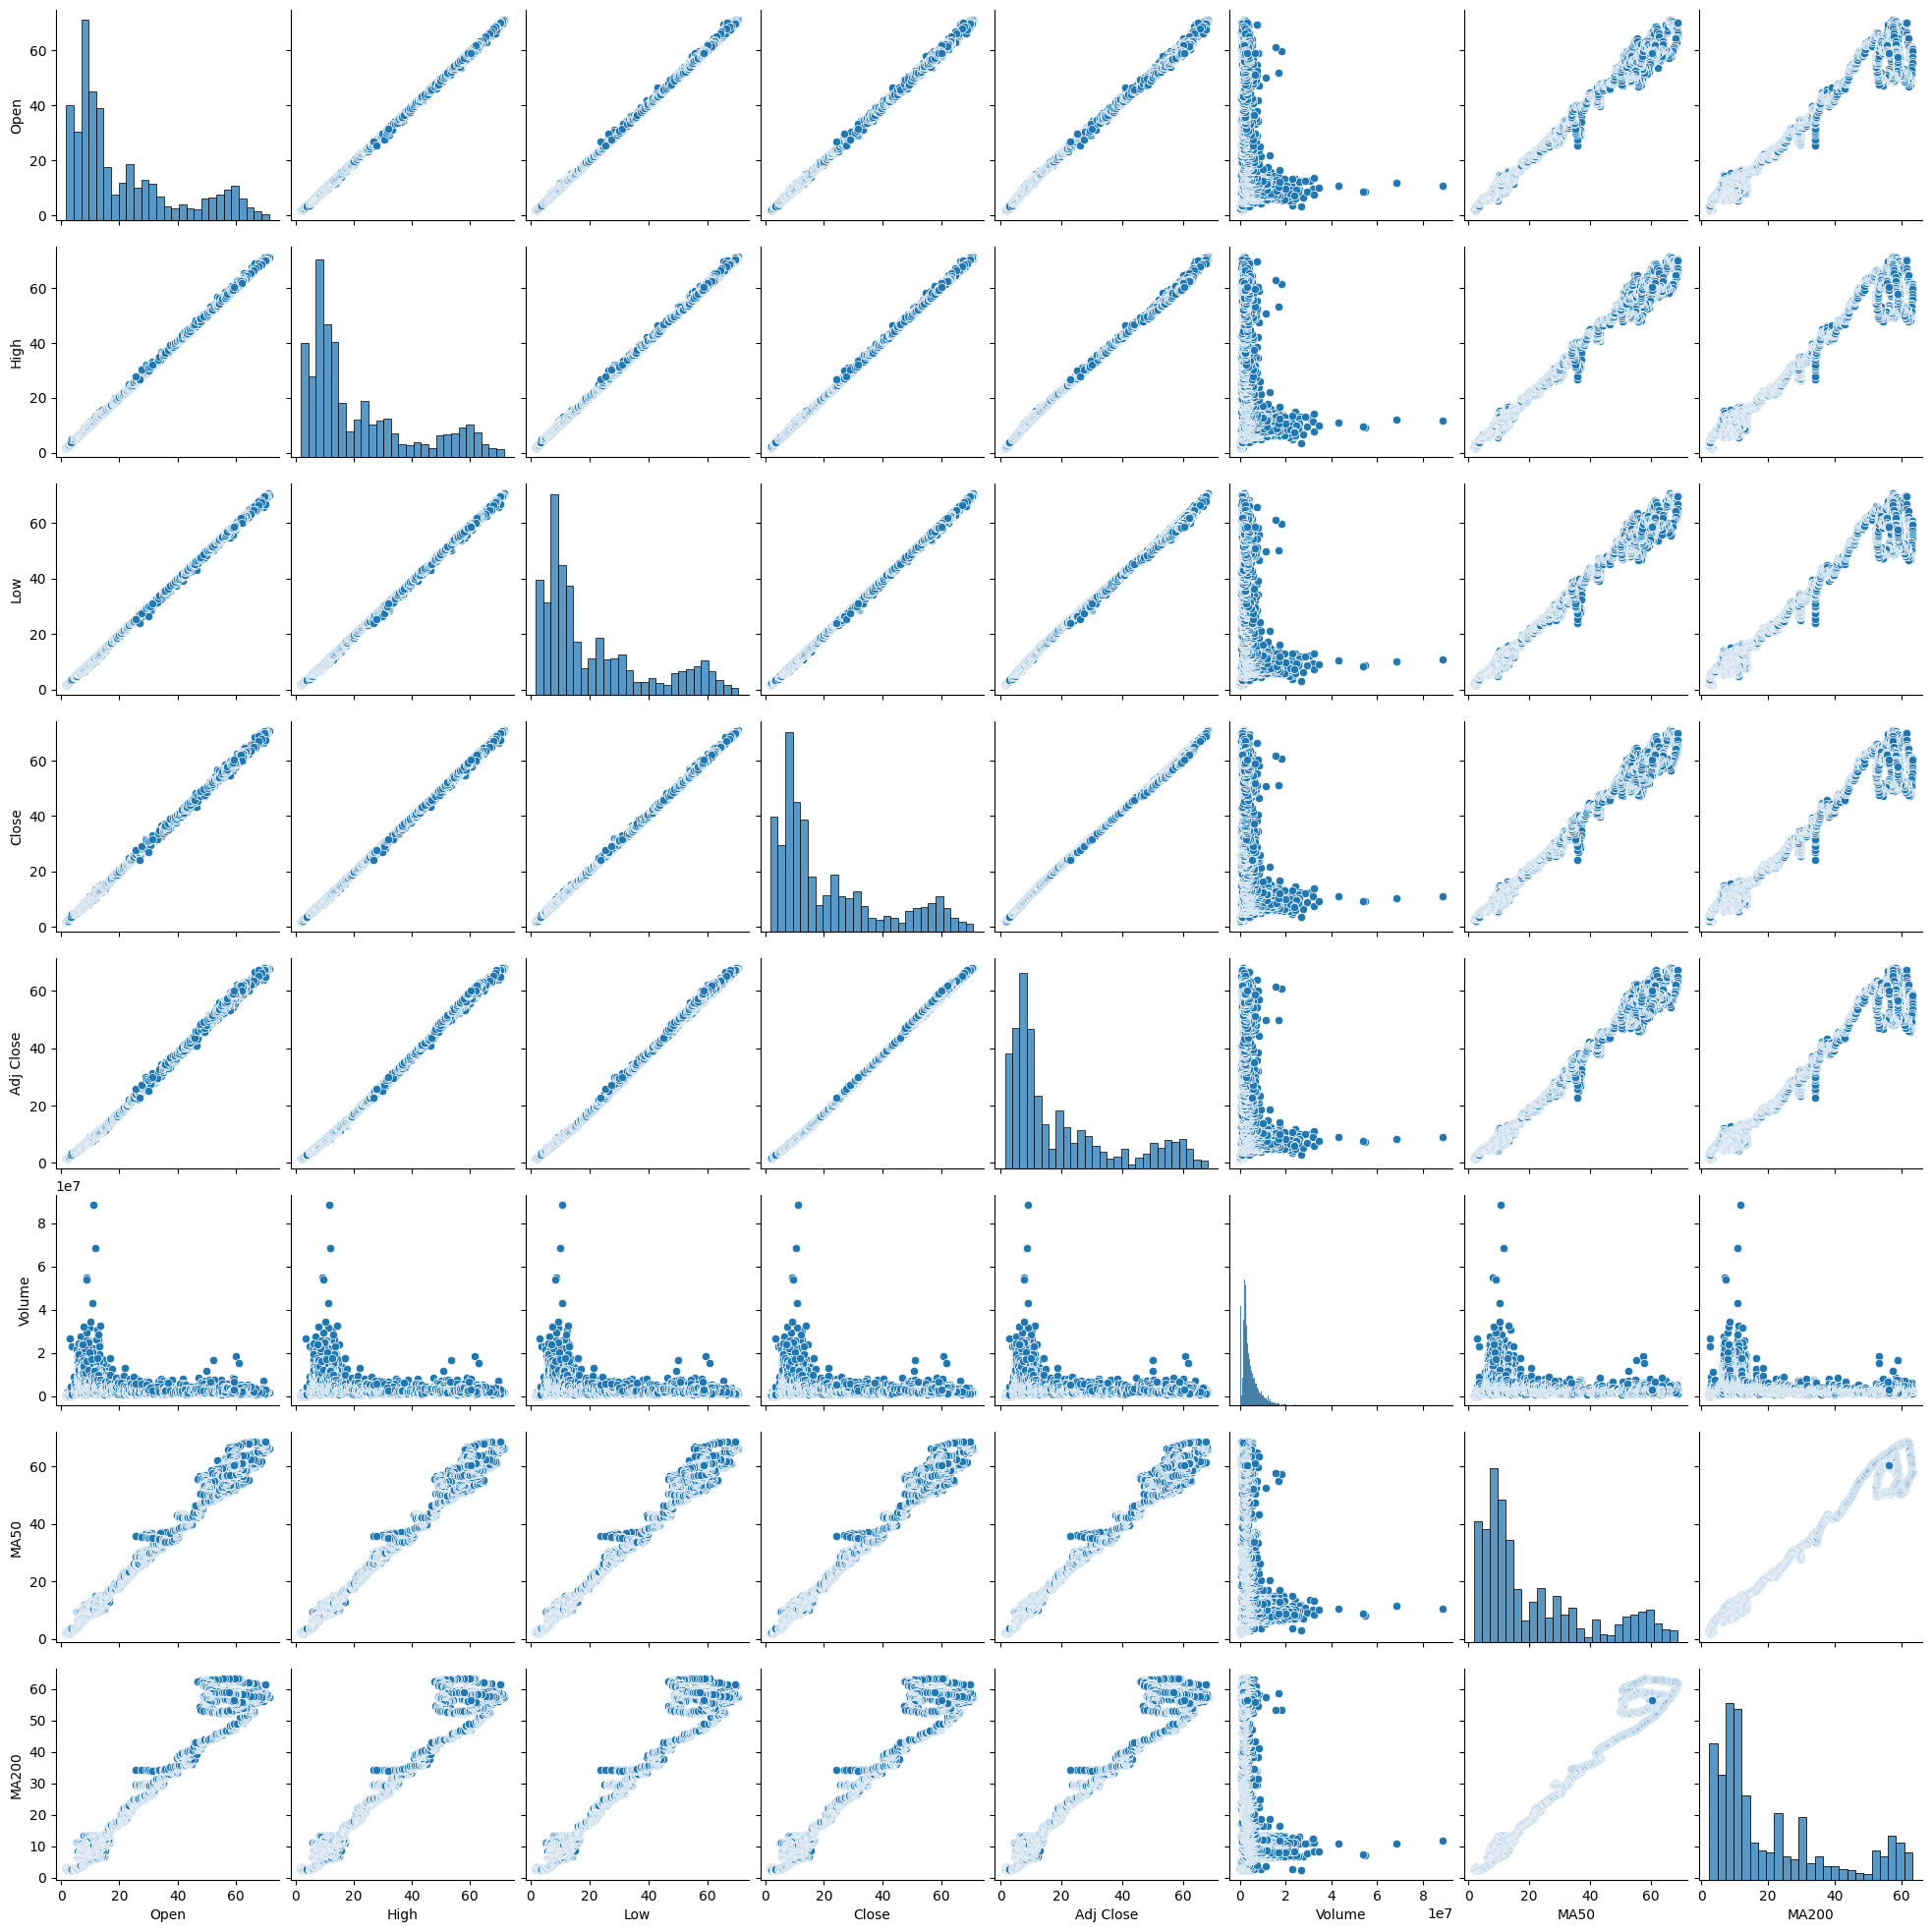

Linear Regression MSE: 0.4638510203725992, R2: 0.9986767567435221
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Regression MSE: 0.051053304001534044, R2: 0.9998543585391131
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for SVR: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
SVR MSE: 0.13082433595882326, R2: 0.9996267930591127


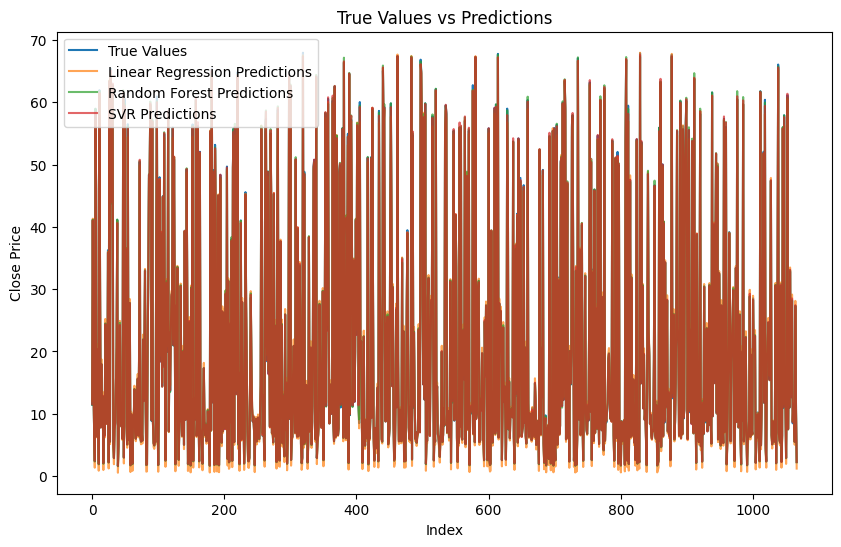

            Predicted_LR  Predicted_RF  Predicted_SVR     Actual
Date                                                            
2007-11-19     12.038420     11.464554      11.535584  11.458755
2020-08-06     41.318847     41.137370      41.024058  41.149426
2015-07-22     15.464040     14.707922      14.783245  14.818927
2006-06-22      7.617301      7.512125       7.548590   7.532767
2003-12-12      1.322635      2.338390       2.409084   2.346316


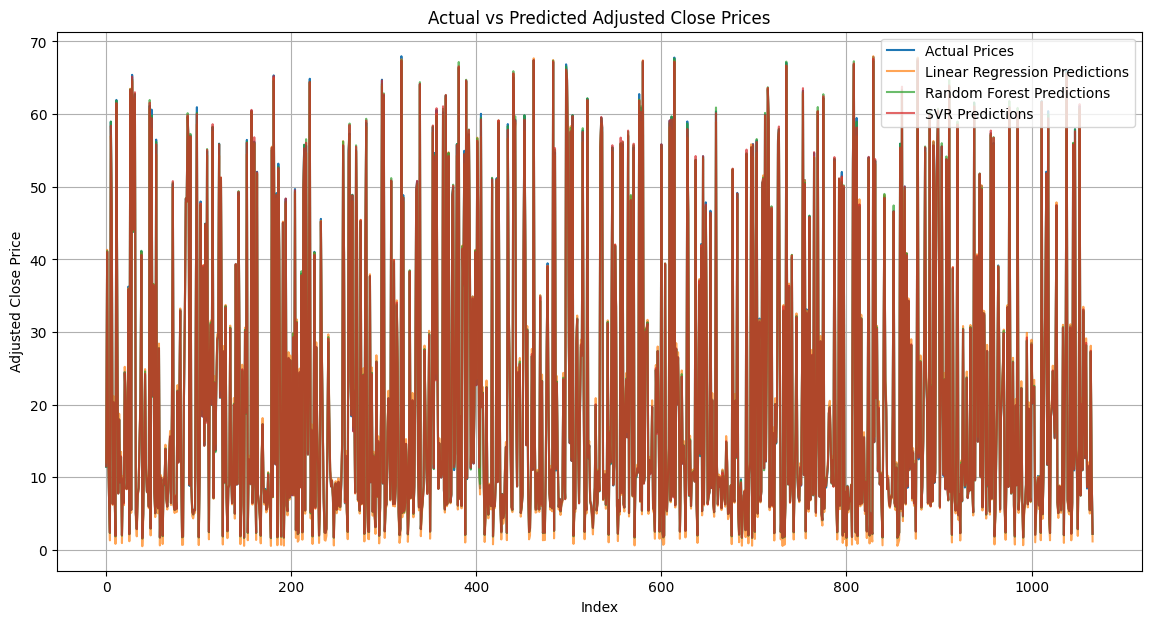

Linear Regression: MSE=0.4638510203725992, R2=0.9986767567435221
Random Forest Regression: MSE=0.051053304001534044, R2=0.9998543585391131
Support Vector Regression: MSE=0.13082433595882326, R2=0.9996267930591127


In [ ]:
# Step 1: Data Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = '/content/sample_data/NDAQ.csv'
df = pd.read_csv(file_path)

# Display the first few rows and column names
print(df.head())
print(df.columns)

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Handle missing values
df = df.dropna()

# Feature engineering: Moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Drop rows with NaN values created by rolling averages
df = df.dropna()

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']
X = df[features]
y = df['Adj Close']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Exploratory Data Analysis (EDA)
# Adjusted close price over time
plt.figure(figsize=(14, 7))
df['Adj Close'].plot()
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()

# Descriptive statistics
print(df.describe())

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Histogram of all columns
df.hist(bins=50, figsize=(20, 15))
plt.show()

# Pairplot to visualize relationships between all features
sns.pairplot(df)
plt.show()

# Step 3: Model Building and Hyperparameter Tuning
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}, R2: {r2_lr}')

# Random Forest Regression
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
gs_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
gs_rf.fit(X_train, y_train)
print(f'Best parameters for Random Forest: {gs_rf.best_params_}')
y_pred_rf = gs_rf.best_estimator_.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regression MSE: {mse_rf}, R2: {r2_rf}')

# Support Vector Regression
svr = SVR()
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}
gs_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=3, n_jobs=-1, verbose=2)
gs_svr.fit(X_train, y_train)
print(f'Best parameters for SVR: {gs_svr.best_params_}')
y_pred_svr = gs_svr.best_estimator_.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVR MSE: {mse_svr}, R2: {r2_svr}')

# Step 4: Evaluate the Predictions
# Plot predictions vs true values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Values')
plt.plot(y_pred_lr, label='Linear Regression Predictions', alpha=0.7)
plt.plot(y_pred_rf, label='Random Forest Predictions', alpha=0.7)
plt.plot(y_pred_svr, label='SVR Predictions', alpha=0.7)
plt.title('True Values vs Predictions')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Predict the adjusted close price for the test set and visualize the result
df_predictions = pd.DataFrame(data={'Predicted_LR': y_pred_lr, 'Predicted_RF': y_pred_rf, 'Predicted_SVR': y_pred_svr, 'Actual': y_test})
print(df_predictions.head())

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(df_predictions['Actual'].values, label='Actual Prices')
plt.plot(df_predictions['Predicted_LR'].values, label='Linear Regression Predictions', alpha=0.7)
plt.plot(df_predictions['Predicted_RF'].values, label='Random Forest Predictions', alpha=0.7)
plt.plot(df_predictions['Predicted_SVR'].values, label='SVR Predictions', alpha=0.7)
plt.title('Actual vs Predicted Adjusted Close Prices')
plt.xlabel('Index')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Summary of the performance
print(f'Linear Regression: MSE={mse_lr}, R2={r2_lr}')
print(f'Random Forest Regression: MSE={mse_rf}, R2={r2_rf}')
print(f'Support Vector Regression: MSE={mse_svr}, R2={r2_svr}')


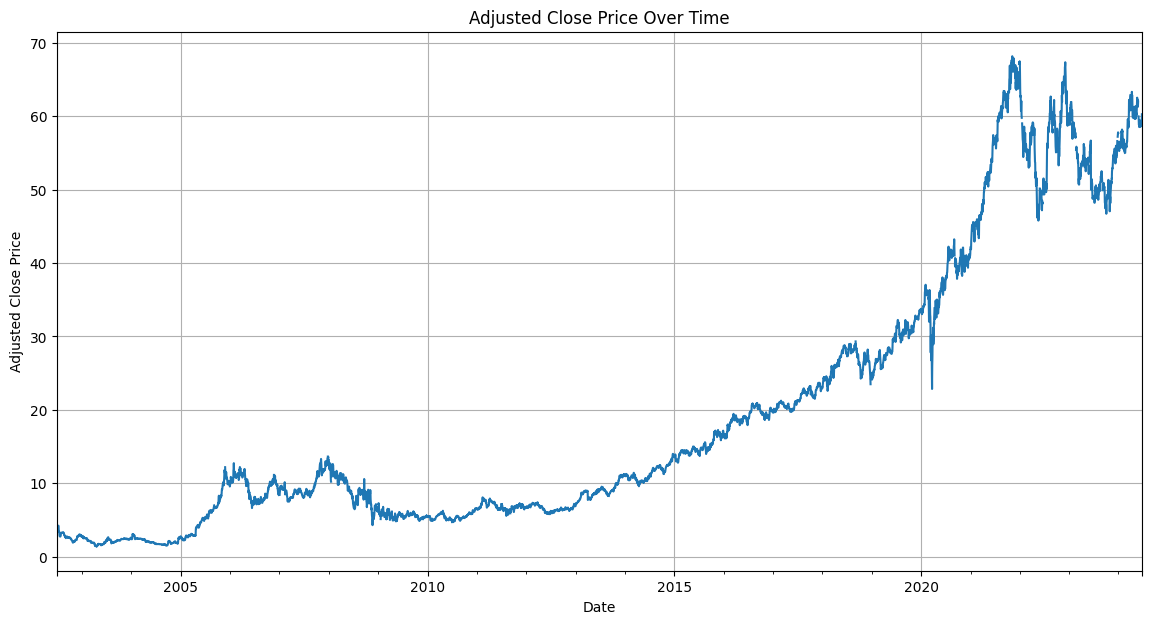

NaNs in train: 162
NaNs in test: 41
Best ARIMA parameters: (2, 2, 1)
NaNs in forecast: 0
Mean Squared Error: 98.71445794884076


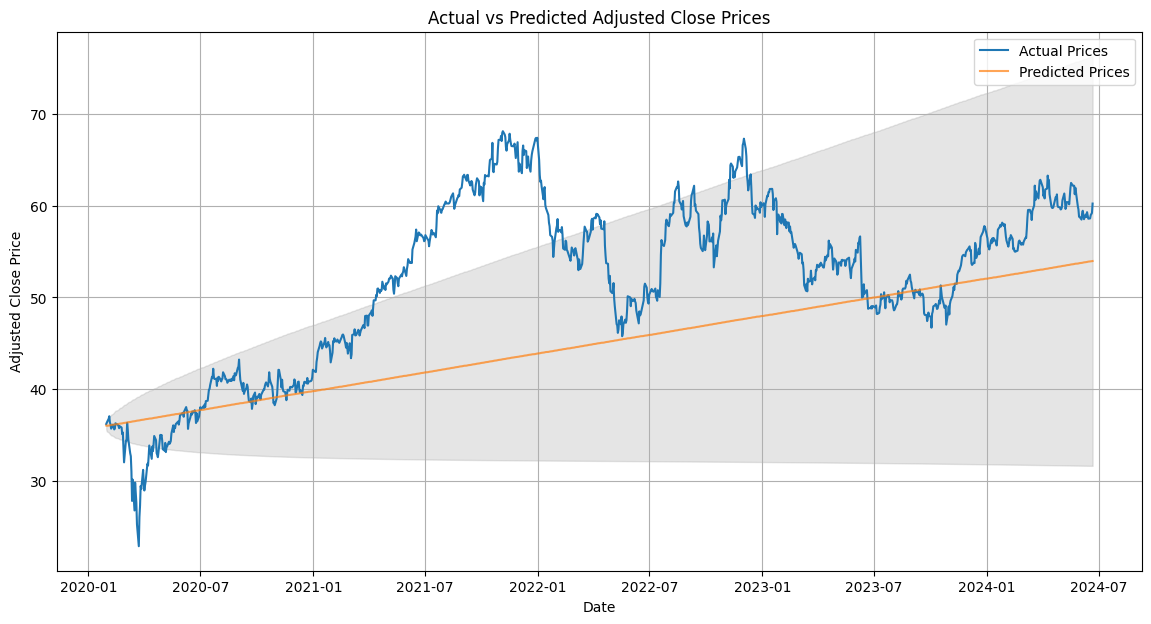

NaNs in future forecast: 0
Future forecast values:
4426    36.017367
4427    35.994607
4428    36.010100
4429    36.027558
4430    36.043887
4431    36.060140
4432    36.076426
4433    36.092715
4434    36.109003
4435    36.125291
4436    36.141579
4437    36.157866
4438    36.174154
4439    36.190442
4440    36.206730
4441    36.223018
4442    36.239306
4443    36.255594
4444    36.271881
4445    36.288169
4446    36.304457
4447    36.320745
4448    36.337033
4449    36.353321
4450    36.369609
4451    36.385896
4452    36.402184
4453    36.418472
4454    36.434760
4455    36.451048
Name: predicted_mean, dtype: float64
Future confidence intervals:
      lower Adj Close  upper Adj Close
4426        35.588208        36.446525
4427        35.382830        36.606384
4428        35.266012        36.754189
4429        35.171345        36.883770
4430        35.088262        36.999512
4431        35.014331        37.105949
4432        34.947459        37.205393
4433        34.886159        37

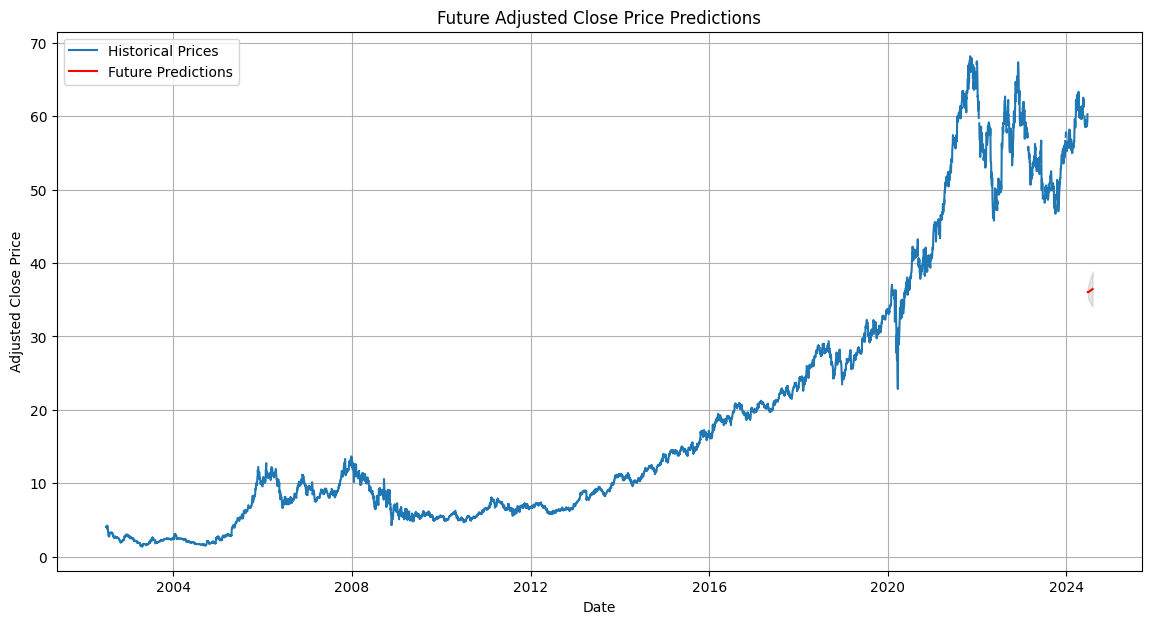

            Predicted   Lower CI   Upper CI
2024-06-24  36.017367  35.588208  36.446525
2024-06-25  35.994607  35.382830  36.606384
2024-06-26  36.010100  35.266012  36.754189
2024-06-27  36.027558  35.171345  36.883770
2024-06-28  36.043887  35.088262  36.999512


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/content/sample_data/NDAQ.csv'
df = pd.read_csv(file_path)

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Handle missing values
df = df.dropna()

# Ensure the date index has a frequency
df = df.asfreq('B')  # 'B' stands for business day frequency

# Plot the adjusted close price
plt.figure(figsize=(14, 7))
df['Adj Close'].plot()
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()


# Train-Test Split
train_size = int(len(df) * 0.8)
train, test = df['Adj Close'][:train_size], df['Adj Close'][train_size:]

# Check for NaNs in the train and test sets
print(f"NaNs in train: {train.isna().sum()}")
print(f"NaNs in test: {test.isna().sum()}")

# If NaNs are present, handle them (e.g., fill or drop)
train = train.dropna()
test = test.dropna()

# Hyperparameter tuning for ARIMA
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
best_score, best_params = float("inf"), None

for param in pdq:
    try:
        model = ARIMA(train, order=param)
        results = model.fit()
        mse = mean_squared_error(test, results.forecast(steps=len(test)))
        if mse < best_score:
            best_score, best_params = mse, param
    except:
        continue

print(f'Best ARIMA parameters: {best_params}')

# Instantiate the model with the best parameters
model = ARIMA(train, order=best_params)
model_fit = model.fit()

# Forecast for test period
forecast_result = model_fit.get_forecast(steps=len(test))
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Check for NaNs in the forecast
print(f"NaNs in forecast: {np.isnan(forecast).sum()}")

# Evaluate the model
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Actual Prices')
plt.plot(test.index, forecast, label='Predicted Prices', alpha=0.7)
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.2)
plt.title('Actual vs Predicted Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Predict future prices
future_steps = 30  # Number of days to predict
future_forecast_result = model_fit.get_forecast(steps=future_steps)
future_forecast = future_forecast_result.predicted_mean
future_conf_int = future_forecast_result.conf_int()

# Check for NaNs in the future forecast
print(f"NaNs in future forecast: {np.isnan(future_forecast).sum()}")
print(f"Future forecast values:\n{future_forecast}")
print(f"Future confidence intervals:\n{future_conf_int}")

# Create a DataFrame for future predictions
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps, freq='B')
future_df = pd.DataFrame({
    'Predicted': future_forecast.values,
    'Lower CI': future_conf_int.iloc[:, 0].values,
    'Upper CI': future_conf_int.iloc[:, 1].values
}, index=future_dates)

# Plot future predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Adj Close'], label='Historical Prices')
plt.plot(future_df.index, future_df['Predicted'], label='Future Predictions', color='red')
plt.fill_between(future_df.index, future_df['Lower CI'], future_df['Upper CI'], color='gray', alpha=0.2)
plt.title('Future Adjusted Close Price Predictions')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

print(future_df.head())



In [ ]:
# Hypothesis
# By using the historical patterns and trends in the data, the model will provide valuable insights and
# predictions that can help in making informed investment decisions.

# Benefits of AI prediction models
# Informed decision can be made by using data-driven predictions of future stock prices
# With accurate forecasting it can help in identifying potential risks and planning strategies to mitigate risks.
# Investors can optimize their buying and selling strategies based on the predicted trends
# Also, by using the models, investors can allocate resources efficiently by anticipating market movements.



